# Lucas Asset Pricing with advanced Approximation Methods

### Jo&atilde;o Brogueira and Fabian Sch&uuml;tze

## Introduction

This note describes why and how we modified the computer code of the original <a href="https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/models/lucastree.py">lucastree.py</a> module. We briefly reformulate Lucas' asset pricing problem as found in the  <a href="http://quant-econ.net/py/lucas_model.html">lecture notes</a> . Denote by $y$ the fruit of the tree. The fruit’s growth rate follows the process $G(y,z') = y^\alpha z'$ with $z' \sim \log N(0,\sigma^2)$. The investor has CRRA preferences with curvature parameter $\gamma$ and discount factor $\beta$. Following <a href="https://www.jstor.org/stable/1913837?seq=1#page_scan_tab_contents">Lucas (1978)</a> , the pricing function, $p(y)$, solves the functional equation:

$$ f(y) = h(y) + \beta \int_Z f(G(y,z')) Q(dz').$$
with
\begin{align*}
   f(y) &= p(y)y^{-\gamma}, \\ 
   h(y) &= \beta \int_Z \left( G(y,z') \right)^{1-\gamma} Q(dz') = \beta y^{ (1-\gamma)\alpha } \exp \left( (1-\gamma)^2  \sigma^2/2 \right).
\end{align*}

We want the numeric solution $f$ to comply with theoretical predictions about its functional form. In the following, it is first documented under which circumstances $h$ transmits montoncity and concavity onto  $f$. In particular, we prove that if $G$ is strictly increasing and concave <sup><a href="#fn1" id="ref1">1</a></sup>, $h$ transmits the sign of its first and second derivatives onto $f$. Additionally, we show that if both $G$ and $h$ are strictly decreasing and convex,  $f$ is strictly decreasing and convex as well. The solution to the functional equation is numerically obtained by iterating the contraction mapping $Tf(y) = h(y) + \beta \int_Z f(G(y,z')) Q(dz')$ until the distance between two successive iterations is smaller than a tolerance criteria. To compute the integral numerically,  $f(G(y,z'))$ needs to be evaluated at arguments $y$ that are not on the grid. This is a chance to impose the properties of $h$ onto $f$ through an appropriate approximation routine. This note discusses how to implement such a routine at the end.

<sup id="fn1">1. For the sake of brevity, when writing strictly increasing and concave we really mean strictly increasing and strictly concave. Also, strictly decreasing and convex refers to strictly decreasing and strictly convex, etc. <a href="#ref1" t></a></sup>



## Theoretical Predictions about the Functional Form of the Solution to Lucas' Asset Pricing Equation 

This section documents under which circumstances $f$ inherits the sign of the first and second derivatives of $h$. In the following, suppose all necessary assumptions to guarantee a unique solution to Lucas' asset pricing problem are satisfied. One assumption is that the function $h$ is bounded in the supremum norm. Numercially, the assumption is satisfied because the  lower end of the interval $Y$ is striclty positive and because $Y$ is bounded. Theoretically, one can prove that the $h$ needs only be bounded in a weighted supremum norm when the parameter $\alpha > 0$. Based on exercise 9.7 of the book by <a href="http://www.hup.harvard.edu/catalog.php?isbn=9780674750968">Stokey and Lucas with Prescott (1989)</a>, we prove the following proposition: 

**Proposition** 

1. Suppose $G$ is strictly increasing and concave in $y$. If $h$ is sctrictly increasing and convave, $f$ is strictly increasing and concave. If $h$ is sctrictly decreasing and convex, $f$ is strictly decreasing and convex.
2. Suppose $G$ is strictly decreasing and convex in $y$. If $h$ is strictly decreasing and convex, $f$ is strictly decreasing and convex.

**Proof**

**1** Following the notation of the  <a href="http://quant-econ.net/py/lucas_model.html">lecture notes</a>, denote by $cb\mathbf{R}_+$ the set of continuous and bounded functions $f:\mathbf{R}_{+} \rightarrow \mathbf{R}_{+}$ . The set $cb'\mathbf{R}_{+} \subset cb\mathbf{R}_{+}$ is the set of continuous, bounded, nondecreasing and concave functions, and $cb''\mathbf{R}_{+} \subset cb'\mathbf{R}_{+}$ imposes additionally strict monotonicity and concavity. We want to show that the contraction operator $T$ maps any function $\tilde{f} \in cb'\mathbf{R}_{+}$ into the subset $cb''\mathbf{R}_{+}$. As the solution to the functional equation is characterized by $Tf = f$ and $cb'\mathbf{R}_{+}$ is a closed set, if the operator $T$ transforms any nondecreasing and concave function into a strictly increasing and concave function, then $f$ is strictly increasing and concave (Corollary 1 of the Contraction Mapping Theorem in Stokey and Lucas with Prescott (1989), p. 52).
  
To show the desired result, suppose first that  $h$ is strictly increasing and concave and pick any $\tilde{f} \in cb'\mathbf{R}_{+}$. To begin, study whether $T\tilde{f}$ is strictly increasing. For any pair $\hat{y},y \in Y$ with $\hat{y} > y$, the function $T\tilde{f}$ satisfies: 

\begin{align*}
T\tilde{f}(\hat{y}) &= h(\hat{y}) + \beta \int_Z \tilde{f}( G(\hat{y},z')) Q(dz')\\
			   	  	&> h(y) + \beta \int_Z \tilde{f}( G(y,z')) Q(dz')\\
		   	    	&= T\tilde{f}(y).
\end{align*}
                         
The inequality holds because $G$ and $h$ are strictly increasing and $\tilde{f}$ is nondecreasing. Hence, $T\tilde{f}$ is strictly increasing. 

To analyze concavity, define $y_{\omega} = \omega y + (1-\omega) y'$, for any $y,y' \in Y$, $y \neq y'$, and $0 < \omega < 1$. The strict concavity form of $h$ and $G$, together with $\tilde{f}$ being concave, ensure that:

\begin{align*}
T\tilde{f}(y_\omega) &= h(y_\omega) + \beta \int_Z \tilde{f}( G(y_\omega,z')) Q(dz') \\
	       		     &> \omega \left[ h(y) + \beta \int_Z \tilde{f}( G(y,z')) Q(dz') \right] + (1 - \omega) \left[  h(y') + \beta \int_Z \tilde{f}( G(y',z')) Q(dz') \right] \\
		  	 		 &= \omega T\tilde{f}(y) + (1-\omega) T \tilde{f}(y').
\end{align*}

The function $T\tilde{f}$ is stricly concave. Taken together, we know that for any $\tilde{f} \in cb'\mathbf{R}_{+}$, $T\tilde{f} \in cb''\mathbf{R}_{+}$. Hence, $f$ must be an element of the set $cb''\mathbf{R}_+$, guaranteeing that $f$ has the same functional form as $h$.<br> <br>
Now, suppose $h$ is convex and decreasing. We could again define the operator $T$ as $Tf(y) = h(y) + \beta \int_Z f(G(y,z'))  Q(dz')$ and study into which subset a candidate solution is mapped into. To facilitate analysis though, take a different route. Look at the modified operator 
$$Tf_{-} = h_{-} + \beta \int_Z f_{-} (G(y,z')) Q(z'),$$
with $h_{-}	 = -h$ and $f_{-} = -f$. Under the same assumptions guaranteeing a unique solution to the original contraction mapping, there exists a unique solution to the modified contraction mapping. As $h_{-}$ is strictly increasing and concave, the proof above applies to the modified contraction mapping. As $f_{-}$ is strictly increasing and concave, $f$ is strictly decreasing and convex and inherits the properties of $h$. 

**2** As both $G$ and $h$ are strictly decreasing and convex, one can proceed in a similar fashion as in case (1.) to show that $h$ transmits its functional form to $f$. 

The different cases of the proposition can be rephrased in terms of the values of the parameters $\gamma,\alpha$. The functional form of $h$ is jointly determined by $\gamma,\alpha$ as $h(y) = y^{(1-\gamma)\alpha} \exp \left( (1-\gamma)^2 \sigma^2/2 \right)$. If $0 < \alpha < 1$, $G$ is strictly increasing and concave and case (1.) of the proposition applies. If  $0 < \gamma < 1$, $f$ is strictly increasing and concave. If $\gamma > 1$, $f$ is strictly decreasing and convex. In contrast, suppose $-1 < \alpha < 0$. If $0 < \gamma < 1$ case (2.) of the proposition applies and $f$ is strictly decreasing and convex. If $\gamma > 1$, theory does not offer any help in determining the functional form of $f$. In this situation $G$ is decreasing and convex, while $h$ is increasing. Our proposition is deliberately more restrictive than the one in exercise 9.7 of Stokey and Lucas with Prescott (1989). Because we can calculate the functions $f$ analytically for the special cases of $\alpha \in \left\lbrace 0,1\right\rbrace$, numercial techniques are not needed.

## Imposing the functional form of $h$ onto $f$ through advanced approximation 

This section describes how we impose the functional form of $h$ onto $f$. The solution to the functional equation is numerically obtained by iterating the contraction mapping $Tf(y) = h(y) + \beta \int_Z f(G(y,z')) Q(dz')$ until the distance between two successive iterations is smaller than a tolerance criteria. To compute the integral numerically,  $f(G(y,z'))$ needs to be evaluated at arguments $x$ that are not on the grid through numerical approximation. This approximation is a chance to impose the properties of $h$ onto $f$. The grid points are a set $Y_{\text{Grid}} = \left\lbrace y_1,y_2,\ldots, y_{N-1},y_N \right\rbrace \subset Y$, with $y_l < y_m$ if $l < m$, $l,m \in \mathbf{N}$. Point $x \in Y$ is not on the gird. If $y_1 < x < y_N$ we interpolate the functional $f$ at $x$ by:  

\begin{equation}
f(x) = f(y_L) + \dfrac{f(y_H) - f(y_L)}{h(y_H) - h(y_L)}  \left( h(x) - h(y_L) \right).
\end{equation}

with $y_L = \max \left\lbrace y_i \in Y_{\text{Grid}} : y_i < x  \right\rbrace$ and $y_H = \min \left\lbrace y_i \in Y_{\text{Grid}}: y_i > x \right\rbrace$. For any point $x$ lower than $y_1$ or higher than $y_N$, we define the function value as:

\begin{align}
f(x) = 
   \begin{cases}
   f(y_1) + \dfrac{f(y_1) - f(y_2)}{h(y_1) - h(y_2)} \left(h(x) - h(y_1) \right) & \text{if } x < y_1,\\
   f(y_N) + \dfrac{f(y_N) - f(y_{N-1})}{h(y_N) - h(y_{N-1})} \left( h(x) - h(y_N) \right) & \text{if } x > y_N.
   \end{cases}
\end{align}

The approximation transmits the slope and shape of the function $h$ onto $f$ as $f'(x) \propto h'(x)$ and $f''(x) \propto h''(x)$ because the ratio in front of $h(x)$ is always positive. The function `interpolationFunction` of the modified  `lucastree.py` module converts this idea into computer code. The entire module is contained in the next cell.

In [1]:
%%writefile ./lucastree.py
r"""
Filename: lucastree.py

Authors: Joao Brogueira and Fabian Schuetze 

This file is a slight modification of the lucastree.py file 
by Thomas Sargent, John Stachurski, Spencer Lyon under the 
quant-econ project. We don't claim authorship of the entire file,
but full responsability for it and any existing mistakes.

Solves the price function for the Lucas tree in a continuous state
setting, using piecewise linear approximation for the sequence of
candidate price functions.  The consumption endownment follows the log
linear AR(1) process

.. math::

    log y' = \alpha log y + \sigma \epsilon

where y' is a next period y and epsilon is an iid standard normal shock.
Hence

.. math::

    y' = y^{\alpha} * \xi,

where

.. math::

    \xi = e^(\sigma * \epsilon)

The distribution phi of xi is

.. math::

    \phi = LN(0, \sigma^2),
    
where LN means lognormal.

"""
#from __future__ import division  # == Omit for Python 3.x == #
import numpy as np
from scipy.stats import lognorm
from scipy.integrate import fixed_quad
from quantecon.compute_fp import compute_fixed_point


class LucasTree(object):

    """
    Class to solve for the price of a tree in the Lucas
    asset pricing model

    Parameters
    ----------
    gamma : scalar(float)
        The coefficient of risk aversion in the investor's CRRA utility
        function
    beta : scalar(float)
        The investor's discount factor
    alpha : scalar(float)
        The correlation coefficient in the shock process
    sigma : scalar(float)
        The volatility of the shock process
    grid : array_like(float), optional(default=None)
        The grid points on which to evaluate the asset prices. Grid
        points should be nonnegative. If None is passed, we will create
        a reasonable one for you

    Attributes
    ----------
    gamma, beta, alpha, sigma, grid : see Parameters
    grid_min, grid_max, grid_size : scalar(int)
        Properties for grid upon which prices are evaluated
    init_h : array_like(float)
        The functional values h(y) with grid points being arguments 
    phi : scipy.stats.lognorm
        The distribution for the shock process

    Notes
    -----
    This file is a slight modification of the lucastree.py file 
    by Thomas Sargent, John Stachurski, Spencer Lyon, [SSL]_ under the 
    quant-econ project. We don't claim authorship of the entire file,
    but full responsability for it and any existing mistakes.

    References
    ----------
    .. [SSL] Thomas Sargent, John Stachurski and Spencer Lyon, lucastree.py,
    GitHub repository, 
    https://github.com/QuantEcon/QuantEcon.py/blob/master/quantecon/models/lucastree.py

    Examples
    --------
    >>> tree = LucasTree(gamma=2, beta=0.95, alpha=0.90, sigma=0.1)
    >>> grid, price_vals = tree.grid, tree.compute_lt_price()

    """

    def __init__(self, gamma, beta, alpha, sigma, grid=None):
        self.gamma = gamma
        self.beta = beta
        self.alpha = alpha
        self.sigma = sigma

        # == set up grid == #
        if grid is None:
            (self.grid, self.grid_min,
             self.grid_max, self.grid_size) = self._new_grid()
        else:
            self.grid = np.asarray(grid)
            self.grid_min = min(grid)
            self.grid_max = max(grid)
            self.grid_size = len(grid)

        # == set up distribution for shocks == #
        self.phi = lognorm(sigma)

        # == set up integration bounds. 4 Standard deviations. Make them
        # private attributes b/c users don't need to see them, but we
        # only want to compute them once. == #
        self._int_min = np.exp(-5 * sigma)
        self._int_max = np.exp(5 * sigma)

        # == Set up h for the Lucas Operator == #
        self.init_h = self.h(self.grid)

    def h(self, x):
        """
        Compute the function values of h in the Lucas operator. 

        Parameters
        ----------
        x : array_like(float)
        The arguments over which to computer the function values 

        Returns
        -------
        h : array_like(float)
        The functional values 

        Notes
        -----
        Recall the functional form of h 

        .. math:: h(x) &= \beta * \int_Z u'(G(x,z)) phi(dz)
                       &= \beta x**((1-\gamma)*\alpha) * \exp((1-\gamma)**2 *\sigma /2) 

        """
        alpha, gamma, beta, sigma = self.alpha, self.gamma, self.beta, self.sigma
        h = beta * x**((1 - gamma) * alpha) * \
            np.exp((1 - gamma)**2 * sigma**2 / 2) * np.ones(x.size)

        return h

    def _new_grid(self):
        """
        Construct the default grid for the problem

        This is defined to be np.linspace(0, 10, 100) when alpha >= 1
        and 100 evenly spaced points covering 4 standard deviations
        when alpha < 1

        """
        grid_size = 50
        if abs(self.alpha) >= 1.0:
            grid_min, grid_max = 0.1, 10
        else:
            # == Set the grid interval to contain most of the mass of the
            # stationary distribution of the consumption endowment == #
            ssd = self.sigma / np.sqrt(1 - self.alpha**2)
            grid_min, grid_max = np.exp(-4 * ssd), np.exp(4 * ssd)

        grid = np.linspace(grid_min, grid_max, grid_size)

        return grid, grid_min, grid_max, grid_size

    def integrate(self, g, int_min=None, int_max=None):
        """
        Integrate the function g(z) * self.phi(z) from int_min to
        int_max.

        Parameters
        ----------
        g : function
            The function which to integrate

        int_min, int_max : scalar(float), optional
            The bounds of integration. If either of these parameters are
            `None` (the default), they will be set to 4 standard
            deviations above and below the mean.

        Returns
        -------
        result : scalar(float)
            The result of the integration

        """
        # == Simplify notation == #
        phi = self.phi
        if int_min is None:
            int_min = self._int_min
        if int_max is None:
            int_max = self._int_max

        # == set up integrand and integrate == #
        integrand = lambda z: g(z) * phi.pdf(z)
        result, error = fixed_quad(integrand, int_min, int_max, n=20)
        return result, error

    def Approximation(self, x, grid, f):
        r"""
        Approximates the function f at given sample points x.

        Parameters
        ----------
        x: array_like(float)
            Sample points over which the function f is evaluated

        grid: array_like(float) 
            The grid values representing the domain of f 

        f: array_like(float)
            The function values of f over the grid 

        Returns:
        --------
        fApprox: array_like(float)
            The approximated function values at x

        Notes
        -----
        Interpolation is done by the following function:

        .. math:: f(x) = f(y_L) + \dfrac{f(y_H) - f(y_L)}{h(y_H) - h(y_L)} (h(x) - h(y_L) ).

        Extrapolation is done as follows:

        .. math:: f(x) = 
        \begin{cases}
        f(y_1) + \dfrac{f(y_1) - f(y_2)}{h(y_1) - h(y_2)} \left(h(x) - h(y_1) \right) & \text{if } x < y_1,\\
        f(y_N) + \dfrac{f(y_N) - f(y_{N-1})}{h(y_N) - h(y_{N-1})} \left( h(x) - h(y_N) \right) & \text{if } x > y_N.
        \end{cases}

        The approximation routine imposes the functional
        form of the function :math:`h` onto the function math:`f`, as stated
        in chapter 9.2 (in particular theorem 9.6 and 9.7 and exercise 9.7) of the 
        book by Stokey, Lucas and Prescott (1989).

        """
        # == Initalize and create empty arrays to be filled in the == #
        gamma, sigma, beta = self.gamma, self.sigma, self.beta
        hX, hGrid = self.h(x), self.init_h
        fL, fH, fApprox = np.empty_like(x), np.empty_like(x), np.empty_like(x)
        hL, idxL, idxH, hH = np.empty_like(x), np.empty_like(
            x), np.empty_like(x), np.empty_like(x)

        # == Create Boolean array to determine which sample points are used for interpoltion
        # and which are used for extrapolation == #
        lower, middle, upper = (x < grid[0]), (x > grid[0]) & (
            x < grid[-1]), (x > grid[-1])

        # == Calcualte the indices of y_L, idxL[index], and y_H ,idxH[index], that are below and above a sample point, called value.
        # In the notation of the interpolation routine, these indices are used to pick the function values
        # f(y_L),f(y_H),h(y_L) and h(y_H) == #
        for index, value in enumerate(x):
            # Calculates the indices of y_L
            idxL[index] = (np.append(grid[grid <= value], grid[0])).argmax()
            idxH[index] = min(idxL[index] + 1, len(grid) - 1)
            fL[index] = f[idxL[index]]
            fH[index] = f[idxH[index]]
            hL[index] = hGrid[idxL[index]]
            hH[index] = hGrid[idxH[index]]

        # == Interpolation == #
        if self.alpha != 0:
            ratio = (fH[middle] - fL[middle]) / (hH[middle] - hL[middle])
        elif self.alpha == 0:
            # If self.alpha ==0, `ratio` is zero, as hH == hL
            ratio = (hH[middle] - hL[middle])
        fApprox[middle] = fL[middle] + ratio * (hX[middle] - hL[middle])

        # == Extrapolation == #
        if self.alpha != 0:
            fApprox[lower] = f[
                0] + (f[0] - f[1]) / (hGrid[0] - hGrid[1]) * (hX[lower] - hGrid[0])
            fApprox[upper] = f[-1] + \
                (f[-1] - f[-2]) / (hGrid[-1] - hGrid[-2]) * \
                (hX[upper] - hGrid[-1])
        elif self.alpha == 0:
            fApprox[lower] = f[0]
            fApprox[upper] = f[-1]

        return fApprox

    def lucas_operator(self, f, Tf=None):
        """
        The approximate Lucas operator, which computes and returns the
        updated function Tf on the grid points.

        Parameters
        ----------
        f : array_like(float)
            A candidate function on R_+ represented as points on a grid
            and should be flat NumPy array with len(f) = len(grid)

        Tf : array_like(float)
            Optional storage array for Tf

        Returns
        -------
        Tf : array_like(float)
            The updated function Tf

        Notes
        -----
        The argument `Tf` is optional, but recommended. If it is passed
        into this function, then we do not have to allocate any memory
        for the array here. As this function is often called many times
        in an iterative algorithm, this can save significant computation
        time.

        """
        grid,  h = self.grid, self.init_h
        alpha, beta = self.alpha, self.beta

        # == set up storage if needed == #
        if Tf is None:
            Tf = np.empty_like(f)

        # == Apply the T operator to f == #
        Af = lambda x: self.Approximation(x, grid, f)

        for i, y in enumerate(grid):
            Tf[i] = h[i] + beta * self.integrate(lambda z: Af(y**alpha * z))[0]

        return Tf

    def compute_lt_price(self, error_tol=1e-7, max_iter=600, verbose=0):
        """
        Compute the equilibrium price function associated with Lucas
        tree lt

        Parameters
        ----------
        error_tol, max_iter, verbose
            Arguments to be passed directly to
            `quantecon.compute_fixed_point`. See that docstring for more
            information


        Returns
        -------
        price : array_like(float)
            The prices at the grid points in the attribute `grid` of the
            object

        """
        # == simplify notation == #
        grid, grid_size = self.grid, self.grid_size
        lucas_operator, gamma = self.lucas_operator, self.gamma

        # == Create storage array for compute_fixed_point. Reduces  memory
        # allocation and speeds code up == #
        Tf = np.empty(grid_size)

        # == Initial guess, just a vector of ones == #
        f_init = np.ones(grid_size)
        f = compute_fixed_point(lucas_operator, f_init, error_tol,
                                max_iter, verbose, Tf=Tf)

        price = f * grid**gamma

        return price


Overwriting ./lucastree.py


The following two figures plot the functions $h,f$ and their first and second differences for parameters $(\gamma,\alpha) \in \left\lbrace (2,0.75),(0.5,0.75),(0.5,-0.75) \right\rbrace$. Note that the x-axis is in indices instead of grid values because the grid values change with different parameters. The graph illustrates that the  sign of the slope and shape of $h$ is transmitted to $f$. We used $|\alpha| = 0.75$ because it generates a relatively strong visual slope of $h$. Our unit testing function also consider autoregressive parameters of $|\alpha| \in \left\lbrace 0.25, 0.5 \right\rbrace$. 

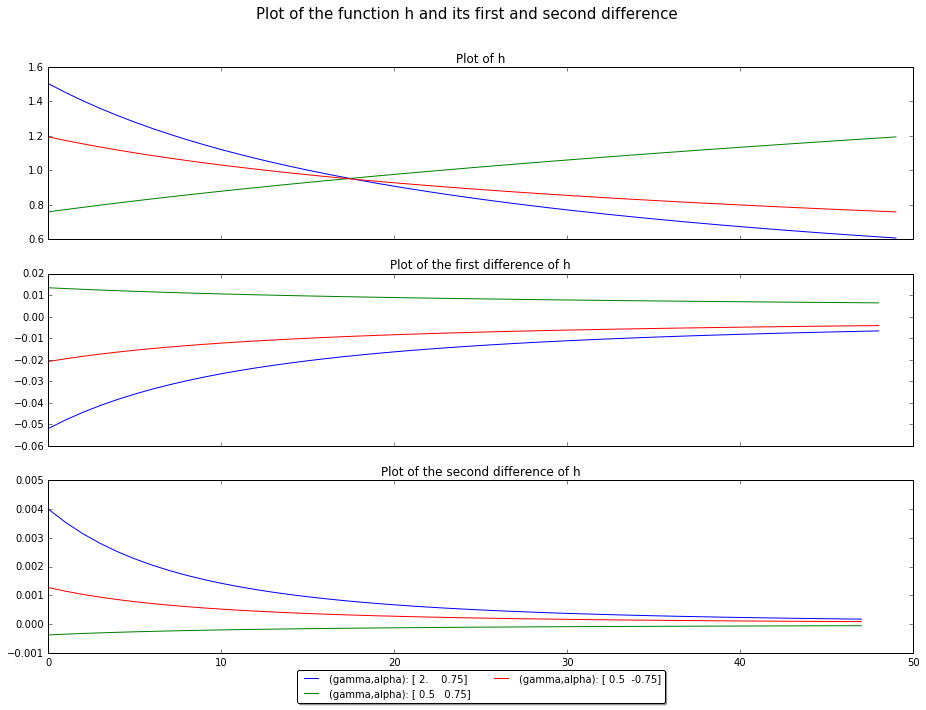

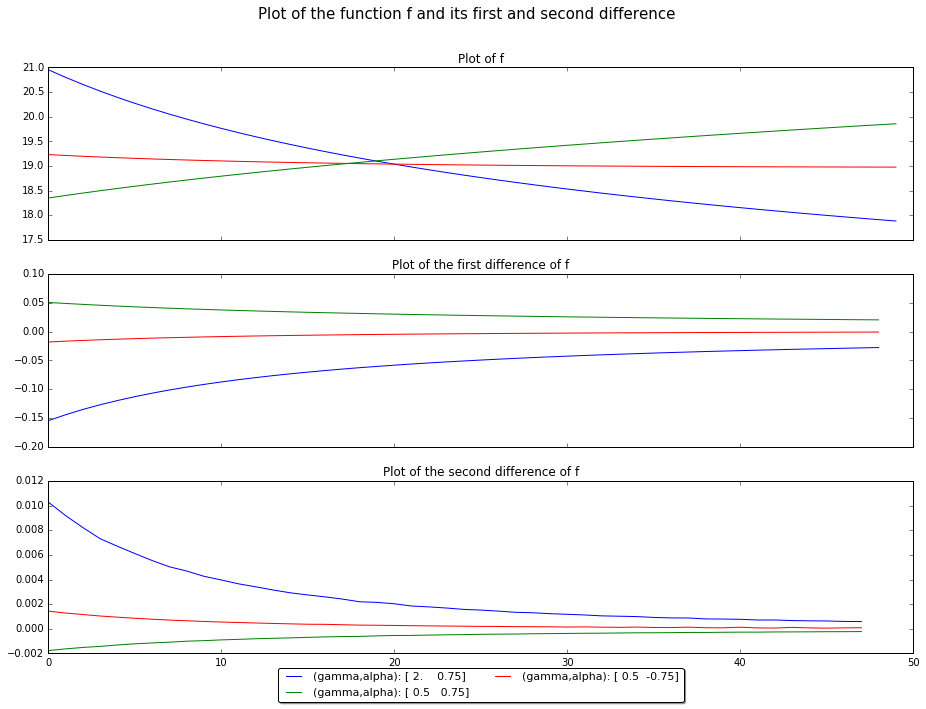

In [2]:
%matplotlib inline
from lucastree import LucasTree
import numpy as np
import matplotlib.pyplot as plt


# first element gamma, second element alpha
vector = np.array([[2, 0.75], [0.5, 0.75], [0.5, -0.75]])
tree = LucasTree(gamma=2, beta=0.95, alpha=0.5, sigma=0.1)
h, hdiff, hdiff2 = np.empty((len(tree.grid), vector.shape[0])), np.empty(
    (len(tree.grid) - 1, vector.shape[0])), np.empty((len(tree.grid) - 2, vector.shape[0]))
for idx, element in enumerate(vector):
    tree = LucasTree(gamma=element[0], beta=0.95, alpha=element[1], sigma=0.1)
    h[:, idx] = tree.h(tree.grid)
    hdiff[:, idx] = np.ediff1d(h[:, idx])
    hdiff2[:, idx] = np.ediff1d(hdiff[:, idx])
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='col')
annotation = ['(gamma,alpha): ' + str((i)) for i in vector]
ax1.plot(h)
ax2.plot(hdiff)
ax3.plot(hdiff2)
ax1.set_title('Plot of h')
ax2.set_title('Plot of the first difference of h')
ax3.set_title('Plot of the second difference of h')
ax3.legend(annotation, loc='upper center', bbox_to_anchor=(0.5, -0.07),
           ncol=2, fancybox=True, shadow=True, fontsize=10)
fig1.suptitle(
    'Plot of the function h and its first and second difference', fontsize=15)
fig1.set_size_inches(15.5, 10.5)
fig1.show()


# first element gamma, second element alpha
vector = np.array([[2, 0.75], [0.5, 0.75], [0.5, -0.75]])
tree = LucasTree(gamma=2, beta=0.95, alpha=0.5, sigma=0.1)
f, fdiff, fdiff2 = np.empty((len(tree.grid), vector.shape[0])), np.empty(
    (len(tree.grid) - 1, vector.shape[0])), np.empty((len(tree.grid) - 2, vector.shape[0]))
price = np.empty_like(f)
for idx, element in enumerate(vector):
    tree = LucasTree(gamma=element[0], beta=0.95, alpha=element[1], sigma=0.1)
    price[:, idx], grid = tree.compute_lt_price(), tree.grid
    f[:, idx] = price[:, idx] * grid**(-element[0])
    fdiff[:, idx] = np.ediff1d(f[:, idx])
    fdiff2[:, idx] = np.ediff1d(fdiff[:, idx])
fig2, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex='col')
annotation = ['(gamma,alpha): ' + str((i)) for i in vector]
ax1.plot(f)
ax2.plot(fdiff)
ax3.plot(fdiff2)
ax1.set_title('Plot of f')
ax2.set_title('Plot of the first difference of f')
ax3.set_title('Plot of the second difference of f')
ax3.legend(annotation, loc='upper center', bbox_to_anchor=(0.5, -0.05),
           ncol=2, fancybox=True, shadow=True, fontsize=11)
fig2.suptitle(
    'Plot of the function f and its first and second difference', fontsize=15)
fig2.set_size_inches(15.5, 10.5)
fig2.show()



The two following figures graphs the solution $f$ if $\alpha \in \left\lbrace 0,1 \right\rbrace$. If  dividends follow an i.i.d. process, ($\alpha = 0$) the function $f$ is constant. We reproduce the numerical results in the top panel of the following figure. The lower subplot graphs the price dividend ratio when dividend growth follows and i.i.d process ($\alpha =1$). As predicted by theory, the price dividend ratio is a constant. 

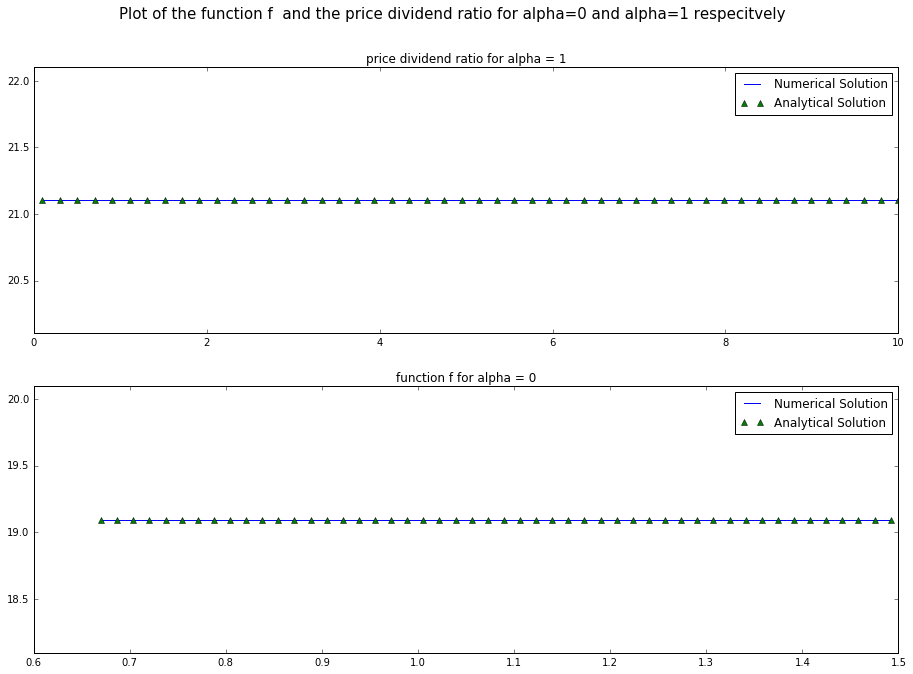

In [3]:
%matplotlib inline
from lucastree import LucasTree
import numpy as np
import matplotlib.pyplot as plt

beta, gamma, sigma = 0.95, 2, 0.1

tree = LucasTree(gamma=gamma, beta=beta, alpha=1, sigma=sigma)
priceLinear, grid = tree.compute_lt_price(), tree.grid
fig1, (ax1, ax2) = plt.subplots(2, 1)
theoreticalPDRatio = np.ones(len(grid)) * beta * np.exp((1 - gamma) **
                                                        2 * sigma**2 / 2) / (1 - beta * np.exp((1 - gamma)**2 * sigma**2 / 2))
ax1.plot(grid, priceLinear / grid, grid, theoreticalPDRatio, 'g^')
annotation = ['Numerical Solution', 'Analytical Solution']
ax1.legend(annotation)
ax1.set_title('price dividend ratio for alpha = 1')
ax1.set_ylim([min(priceLinear / grid) - 1, max(priceLinear / grid) + 1])
tree = LucasTree(gamma=gamma, beta=beta, alpha=0, sigma=sigma)
priceFalling, grid = tree.compute_lt_price(), tree.grid
theoreticalF = np.ones(len(grid)) * beta * \
    np.exp((1 - gamma)**2 * sigma**2 / 2) / (1 - beta)
f = priceFalling * grid**(-2)
ax2.plot(grid, f, grid, theoreticalF, 'g^')
ax2.set_ylim([min(f) - 1, max(f) + 1])
annotation = ['Numerical Solution', 'Analytical Solution']
ax2.legend(annotation)
ax2.set_title('function f for alpha = 0')
fig1.set_size_inches(15.5, 10.5)
fig1.suptitle(
    'Plot of the function f  and the price dividend ratio for alpha=0 and alpha=1 respecitvely', fontsize=15)
fig1.show()


Finally, we report the unit testing function accompanying our lucastree.py module. This file tests if the functional form of $f$ adheres to the theoretical predicitons as outlined by the Proposition above. The file can be run from the Shell.  

In [4]:
%%writefile ./test_lucastree.py
"""
filename: test_lucastree.py

Authors: Joao Brogueira and Fabian Schuetze 

This file contains for different test for the 
lucastree.py file 

Functions
---------
    compute_lt_price()      [Status: Tested in test_ConstantPDRatio, test_ConstantF,
                            test_slope_f, test_shape_f]

"""

import unittest
from lucastree import LucasTree  # This relative importing doesn't work!
import numpy as np


class Testlucastree(unittest.TestCase):

    """
    Test Suite for lucastree.py based on the outout of the 
    LucasTree.compute_lt_price() function.

    """
    # == Parameter values applicable to all test cases == #
    beta = 0.95
    sigma = 0.1

    # == Paramter values for different tests == #
    ConstantPD = np.array([2, 1])
    ConstantF = np.array([2, 0])
    FunctionalForm = np.array([[2, 0.75], [2, 0.5], [2, 0.25], [0.5, 0.75], [
                              0.5, 0.5], [0.5, 0.25], [0.5, -0.75], [0.5, -0.5], [0.5, -0.25]])

    # == Tolerance Criteria == #
    Tol = 1e-2

    def setUp(self):
        self.storage = lambda parameter0, parameter1: LucasTree(gamma=parameter0, beta=self.beta, alpha=parameter1,
                                                                sigma=self.sigma)

    def test_ConstantPDRatio(self):
        """
        Test whether the numerically computed price dividend ratio is 
        identical to its theoretical counterpart when dividend 
        growth follows an idd process

        """
        gamma, alpha = self.ConstantPD
        tree = self.storage(gamma, alpha)
        grid = tree.grid
        theoreticalPDRatio = np.ones(len(grid)) * self.beta * np.exp(
            (1 - gamma)**2 * self.sigma**2 / 2) / (1 - self.beta * np.exp((1 - gamma)**2 * self.sigma**2 / 2))
        self.assertTrue(
            np.allclose(theoreticalPDRatio, tree.compute_lt_price() / grid, atol=self.Tol))

    def test_ConstantF(self):
        """
        Tests whether the numericlaly obtained solution, math:`f` 
        to the functional equation :math:`f(y) = h(y) + \beta \int_Z f(G(y,z')) Q(z')`
        is identical to its theoretical counterpart, when divideds follow an 
        iid process 

        """
        gamma, alpha = self.ConstantF
        tree = self.storage(gamma, alpha)
        grid = tree.grid
        theoreticalF = np.ones(len(
            grid)) * self.beta * np.exp((1 - gamma)**2 * self.sigma**2 / 2) / (1 - self.beta)
        self.assertTrue(np.allclose(
            theoreticalF, tree.compute_lt_price() * grid**(-gamma), atol=self.Tol))

    def test_slope_f(self):
        """
        Tests whether the first difference of the numerically obtained function 
        :math:`f` is has the same sign as the first difference of the function 
        :math:`h`.

        Notes
        -----
        This test is motivated by Theorem 9.7 ans exercise 9.7c) of the 
        book by Stokey, Lucas and Prescott (1989)

        """
        for parameters in self.FunctionalForm:
            gamma, alpha = parameters
            tree = self.storage(gamma, alpha)
            f = tree.compute_lt_price() * tree.grid ** (-gamma)
            h = tree.h(tree.grid)
            fdiff, hdiff = np.ediff1d(f), np.ediff1d(h)
            if all(hdiff > 0):
                self.assertTrue(all(fdiff > 0))
            elif all(hdiff < 0):
                self.assertTrue(all(fdiff < 0))

    def test_shape_f(self):
        """
        Tests whether the second difference of the numerically obtained function 
        :math:`f` is has the same sign as the second difference of the function 
        :math:`h`.

        Notes
        -----
        This test is motivated by Theorem 9.8 ans exercise 9.7d) of the 
        book by Stokey, Lucas and Prescott (1989)

        """
        for parameters in self.FunctionalForm:
            gamma, alpha = parameters
            tree = self.storage(gamma, alpha)
            f = tree.compute_lt_price() * tree.grid ** (-gamma)
            h = tree.h(tree.grid)
            fdiff, hdiff = np.ediff1d(f), np.ediff1d(h)
            fdiff2, hdiff2 = np.ediff1d(fdiff), np.ediff1d(hdiff)
            if all(hdiff2 > 0):
                self.assertTrue(all(fdiff2 > 0))
            elif all(hdiff2 < 0):
                self.assertTrue(all(fdiff2 < 0))

    def tearDown(self):
        pass


Overwriting ./test_lucastree.py
